In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "/content/drive/MyDrive/데이터분석기초/과제/데이터/"
temp = pd.read_csv(path + "기온30_21.csv", header=0)
prec = pd.read_csv(path + "강수량30_21.csv", header=0)
hum = pd.read_csv(path + "습도30_21.csv", header=0)

In [4]:
temp = temp[["일시", "평균기온(℃)"]]
prec = prec[["일시", "강수량(mm)"]]
hum = hum[["일시", "평균습도(%rh)"]]

In [5]:
temp_prec = pd.merge(temp, prec, on="일시")
wheather = pd.merge(temp_prec, hum, on="일시")

In [6]:
wheather.shape    #92년 * 12개월 = 1104개의 값 존재 -> 1090개밖에 없다 어디가 빠졌는지 확인

(1090, 4)

In [7]:
wheather.head()

,일시,평균기온(℃),강수량(mm),평균습도(%rh)
0,Jan.30,-4.5,2.5,63.0
1,Feb.30,0.9,49.1,66.0
2,Mar.30,6.3,92.7,69.0
3,Apr.30,12.5,100.0,69.0
4,May.30,16.7,113.1,70.0


In [9]:
wheather.tail()

,일시,평균기온(℃),강수량(mm),평균습도(%rh)
1085,Aug.21,25.9,211.2,74.0
1086,Sep.21,22.6,131.0,71.0
1087,Oct.21,15.6,57.0,70.0
1088,Nov.21,8.2,62.4,68.0
1089,Dec.21,0.6,7.9,62.0


In [ ]:
wheather["month"] = [a.split(".")[0] for a in wheather["일시"]]
wheather["year"] = [a.split(".")[1] for a in wheather["일시"]]

In [ ]:
wheather.head(2)

,일시,평균기온(℃),강수량(mm),평균습도(%rh),month,year
0,Jan.30,-4.5,2.5,63.0,Jan,30
1,Feb.30,0.9,49.1,66.0,Feb,30


In [ ]:
wheather["month"].value_counts() #8월, 11에 2개씩 나머지 월에 1개, 아예 없는 값이 있다. 14값 존재 하지 않음

Jan    91
Feb    91
Mar    91
Apr    91
May    91
Jun    91
Jul    91
Sep    91
Oct    91
Dec    91
Aug    90
Nov    90
Name: month, dtype: int64

In [ ]:
wheather["year"].value_counts() #52년, 50년, 51년에 빠진 값 존재 

30    12
88    12
97    12
96    12
95    12
      ..
56    12
21    12
52    11
50    10
51     1
Name: year, Length: 92, dtype: int64

In [ ]:
wheather.isnull().sum()

일시            0
평균기온(℃)      25
강수량(mm)       1
평균습도(%rh)    25
month         0
year          0
dtype: int64

In [ ]:
print(wheather[wheather["일시"]=="Jan.50"])
print(wheather[wheather["일시"]=="Dec.52"])

         일시  평균기온(℃)  강수량(mm)  평균습도(%rh) month year
240  Jan.50     -1.3     96.9       71.0   Jan   50
         일시  평균기온(℃)  강수량(mm)  평균습도(%rh) month year
261  Dec.52      NaN     18.1        NaN   Dec   52


In [ ]:
wheather.loc[240:261,:] #50년: 11월 12월 / 51년: 12월 빼고 다 / 52년: 8월 이렇게 아예 없다. 

,일시,평균기온(℃),강수량(mm),평균습도(%rh),month,year
240,Jan.50,-1.3,96.9,71.0,Jan,50
241,Feb.50,-0.4,11.4,64.0,Feb,50
242,Mar.50,4.6,9.0,57.0,Mar,50
243,Apr.50,13.1,41.5,63.0,Apr,50
244,May.50,17.5,37.4,66.0,May,50
245,Jun.50,20.8,110.1,72.0,Jun,50
246,Jul.50,26.0,223.3,77.0,Jul,50
247,Aug.50,26.5,85.6,71.0,Aug,50
248,Sep.50,NaN,117.4,NaN,Sep,50
249,Oct.50,NaN,65.6,NaN,Oct,50


In [ ]:
#추가 
for i in ["Nov.50","Dec.50","Jan.51","Feb.51","Mar.51","Apr.51","May.51",
          "Jun.51","Jul.51","Aug.51","Sep.51","Oct.51","Nov.51","Aug.52"]:
    new_data = {"일시": i, "평균기온(℃)": np.NaN, "강수량(mm)": np.NaN, "평균습도(%rh)": np.NaN}
    wheather = wheather.append(new_data, ignore_index=True)

In [ ]:
wheather.shape

(1104, 6)

In [ ]:
wheather.tail()

,일시,평균기온(℃),강수량(mm),평균습도(%rh),month,year
1099,Aug.51,NaN,NaN,NaN,NaN,NaN
1100,Sep.51,NaN,NaN,NaN,NaN,NaN
1101,Oct.51,NaN,NaN,NaN,NaN,NaN
1102,Nov.51,NaN,NaN,NaN,NaN,NaN
1103,Aug.52,NaN,NaN,NaN,NaN,NaN


In [ ]:
wheather["month"] = [a.split(".")[0] for a in wheather["일시"]]
wheather["year"] = [a.split(".")[1] for a in wheather["일시"]]

In [ ]:
wheather.tail(14)

,일시,평균기온(℃),강수량(mm),평균습도(%rh),month,year
1090,Nov.50,NaN,NaN,NaN,Nov,50
1091,Dec.50,NaN,NaN,NaN,Dec,50
1092,Jan.51,NaN,NaN,NaN,Jan,51
1093,Feb.51,NaN,NaN,NaN,Feb,51
1094,Mar.51,NaN,NaN,NaN,Mar,51
1095,Apr.51,NaN,NaN,NaN,Apr,51
1096,May.51,NaN,NaN,NaN,May,51
1097,Jun.51,NaN,NaN,NaN,Jun,51
1098,Jul.51,NaN,NaN,NaN,Jul,51
1099,Aug.51,NaN,NaN,NaN,Aug,51


In [ ]:
wheather.isnull().sum()

일시            0
평균기온(℃)      14
강수량(mm)      14
평균습도(%rh)    14
month         0
year          0
dtype: int64

In [ ]:
#월별 평균으로 NaN 값 채운다. 
for i in ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]:
    replace_tem = round(wheather[wheather["month"]==i]["평균기온(℃)"].mean(),1)
    replace_prec = round(wheather[wheather["month"]==i]["강수량(mm)"].mean(),1)
    replace_hum = round(wheather[wheather["month"]==i]["평균습도(%rh)"].mean(),1)
    index_tem = wheather[(wheather["month"]==i)&(wheather["평균기온(℃)"].isnull())].index
    index_prec = wheather[(wheather["month"]==i)&(wheather["강수량(mm)"].isnull())].index
    index_hum = wheather[(wheather["month"]==i)&(wheather["평균습도(%rh)"].isnull())].index
    wheather.loc[index_tem, "평균기온(℃)"] = replace_tem
    wheather.loc[index_prec, "강수량(mm)"] = replace_prec
    wheather.loc[index_hum, "평균습도(%rh)" ] = replace_hum

In [ ]:
wheather.tail(14)

,일시,평균기온(℃),강수량(mm),평균습도(%rh),month,year
1090,Nov.50,6.8,47.5,64.9,Nov,50
1091,Dec.50,-0.4,25.0,63.2,Dec,50
1092,Jan.51,-3.3,19.5,61.6,Jan,51
1093,Feb.51,-0.6,24.6,60.7,Feb,51
1094,Mar.51,4.8,46.9,60.7,Mar,51
1095,Apr.51,11.7,79.3,59.9,Apr,51
1096,May.51,17.3,94.7,63.9,May,51
1097,Jun.51,21.7,142.9,70.4,Jun,51
1098,Jul.51,24.9,380.5,79.6,Jul,51
1099,Aug.51,25.6,286.6,76.8,Aug,51


In [ ]:
wheather.loc[240:261,:]

,일시,평균기온(℃),강수량(mm),평균습도(%rh),month,year
240,Jan.50,-1.3,96.9,71.0,Jan,50
241,Feb.50,-0.4,11.4,64.0,Feb,50
242,Mar.50,4.6,9.0,57.0,Mar,50
243,Apr.50,13.1,41.5,63.0,Apr,50
244,May.50,17.5,37.4,66.0,May,50
245,Jun.50,20.8,110.1,72.0,Jun,50
246,Jul.50,26.0,223.3,77.0,Jul,50
247,Aug.50,26.5,85.6,71.0,Aug,50
248,Sep.50,20.9,117.4,70.8,Sep,50
249,Oct.50,14.3,65.6,65.9,Oct,50


In [ ]:
wheather.isnull().sum()

일시           0
평균기온(℃)      0
강수량(mm)      0
평균습도(%rh)    0
month        0
year         0
dtype: int64

In [ ]:
#NaN 값 다 채워짐

In [ ]:
def season(x):
    if x in ["Mar","Apr","May"]:
        return 0
    elif x in ["Jun","Jul","Aug"]:
        return 1
    elif x in ["Sep","Oct","Nov"]:
        return 2
    elif x in ["Dec","Jan","Feb"]:
        return 3

In [ ]:
#target 생성 (0: 봄, 1: 여름, 2: 가을, 3: 겨울)

wheather["target"] = wheather.apply(lambda x: season(x["month"]), axis=1)
wheather.head()

,일시,평균기온(℃),강수량(mm),평균습도(%rh),month,year,target
0,Jan.30,-4.5,2.5,63.0,Jan,30,3
1,Feb.30,0.9,49.1,66.0,Feb,30,3
2,Mar.30,6.3,92.7,69.0,Mar,30,0
3,Apr.30,12.5,100.0,69.0,Apr,30,0
4,May.30,16.7,113.1,70.0,May,30,0


In [ ]:
wheather["target"].value_counts()

3    276
0    276
1    276
2    276
Name: target, dtype: int64

In [ ]:
#상관관계 분석

wt = wheather[["평균기온(℃)","강수량(mm)","평균습도(%rh)"]]
wt.columns = ["tem","prec","hum"]
corr_wt = wt.corr()
corr_wt

,tem,prec,hum
tem,1.000000,0.581666,0.581048
prec,0.581666,1.000000,0.642765
hum,0.581048,0.642765,1.000000


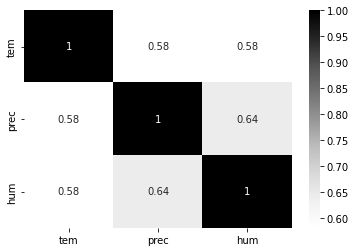

In [ ]:
sns.heatmap(corr_wt, annot=True, cmap="Greys")

In [ ]:
grouped_w = wheather.groupby(by=["year", "target"]).mean()
grouped_w = grouped_w.reset_index(level="target")
grouped_w

,target,평균기온(℃),강수량(mm),평균습도(%rh)
year,,,,
00,0,11.900000,36.333333,59.000000
00,1,25.566667,260.733333,72.666667
00,2,14.200000,74.566667,64.000000
00,3,-0.966667,23.966667,59.333333
01,0,12.566667,15.633333,54.000000
...,...,...,...,...
98,3,1.466667,15.466667,59.333333
99,0,12.700000,87.300000,58.333333
99,1,25.000000,320.900000,71.666667


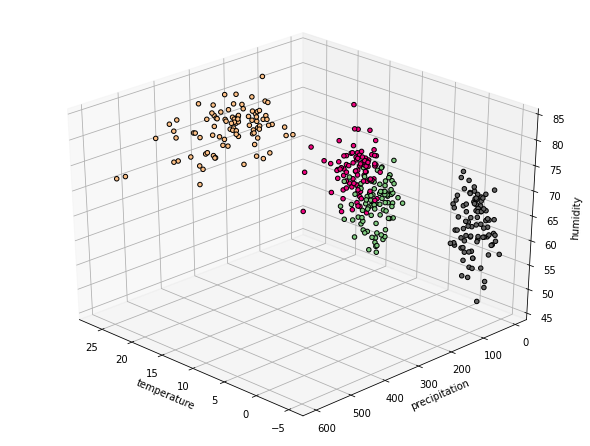

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=30, azim=135)
ax.scatter(grouped_w.iloc[:,1],
           grouped_w.iloc[:,2],
           grouped_w.iloc[:,3],
           c = grouped_w["target"],
           edgecolor="k",
           alpha=1,
           cmap="Accent")

ax.set_xlabel("temperature")
ax.set_ylabel("precipitation")
ax.set_zlabel("humidity")

plt.show()

In [ ]:
grouped_X = grouped_w.iloc[:,1:4]
grouped_y = grouped_w["target"]

In [ ]:
#scale이 제각각 -> 표준화 필요
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()   
grouped_X = scaler.fit_transform(grouped_X)

In [ ]:
#n_cluster=3
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init="k-means++", n_init=20, max_iter=300)
kmeans.fit(grouped_X)

KMeans(n_clusters=3, n_init=20)

In [ ]:
labels3 = kmeans.labels_

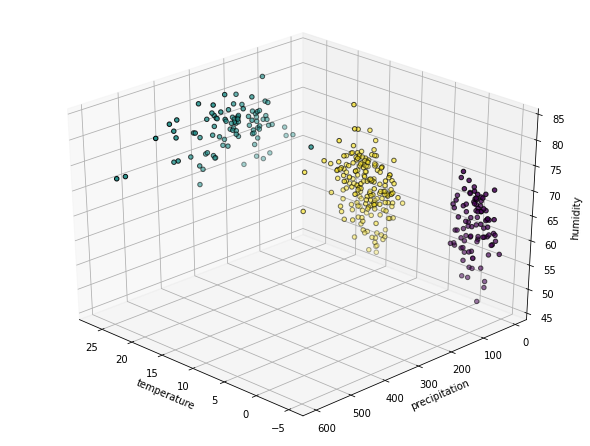

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=30, azim=135)
ax.scatter(grouped_w.iloc[:,1],
           grouped_w.iloc[:,2],
           grouped_w.iloc[:,3],
           c = labels3,
           edgecolor="k")

ax.set_xlabel("temperature")
ax.set_ylabel("precipitation")
ax.set_zlabel("humidity")

plt.show()

In [ ]:
grouped_w["cluster_3"] = labels3
grouped_w

,target,평균기온(℃),강수량(mm),평균습도(%rh),cluster_3
year,,,,,
00,0,11.900000,36.333333,59.000000,2
00,1,25.566667,260.733333,72.666667,1
00,2,14.200000,74.566667,64.000000,2
00,3,-0.966667,23.966667,59.333333,0
01,0,12.566667,15.633333,54.000000,2
...,...,...,...,...,...
98,3,1.466667,15.466667,59.333333,0
99,0,12.700000,87.300000,58.333333,2
99,1,25.000000,320.900000,71.666667,1


In [ ]:
pd.crosstab(grouped_w["target"], grouped_w["cluster_3"])

cluster_3,0,1,2
target,,,
0,0,0,92
1,0,92,0
2,0,1,91
3,92,0,0


In [ ]:
#n_cluster=4
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init="k-means++", n_init=20, max_iter=300)
kmeans.fit(grouped_X)

KMeans(n_clusters=4, n_init=20)

In [ ]:
labels4 = kmeans.labels_

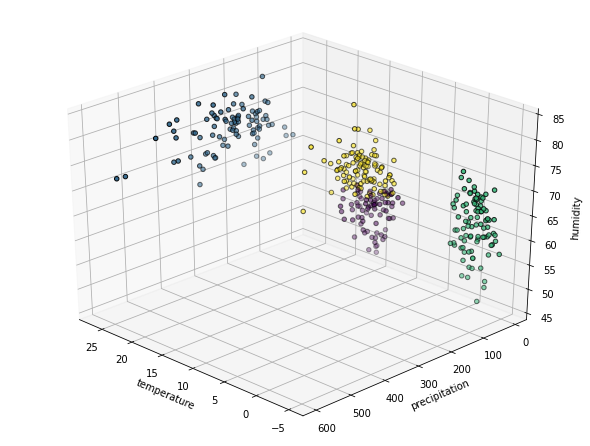

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=30, azim=135)
ax.scatter(grouped_w.iloc[:,1],
           grouped_w.iloc[:,2],
           grouped_w.iloc[:,3],
           c = labels4,
           edgecolor="k")

ax.set_xlabel("temperature")
ax.set_ylabel("precipitation")
ax.set_zlabel("humidity")

plt.show()

In [ ]:
grouped_w["cluster_4"] = labels4
grouped_w

,target,평균기온(℃),강수량(mm),평균습도(%rh),cluster_3,cluster_4
year,,,,,,
00,0,11.900000,36.333333,59.000000,2,0
00,1,25.566667,260.733333,72.666667,1,1
00,2,14.200000,74.566667,64.000000,2,3
00,3,-0.966667,23.966667,59.333333,0,2
01,0,12.566667,15.633333,54.000000,2,0
...,...,...,...,...,...,...
98,3,1.466667,15.466667,59.333333,0,2
99,0,12.700000,87.300000,58.333333,2,0
99,1,25.000000,320.900000,71.666667,1,1


In [ ]:
pd.crosstab(grouped_w["target"], grouped_w["cluster_4"])

cluster_4,0,1,2,3
target,,,,
0,60,0,0,32
1,0,92,0,0
2,17,0,0,75
3,0,0,92,0
